In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import json
import pprint
from datetime import date
import warnings
warnings.filterwarnings("ignore")

# 1. Historical stock prices

### 1.1 Extended time period - using the 'stock-prices' API call

In [2]:
%%time
url = "https://yahoofinance-stocks1.p.rapidapi.com/stock-prices"

querystring = {"EndDateInclusive":"2020-06-23","StartDateInclusive":"2020-06-21","Symbol":"GOOG","OrderBy":"Ascending"}

headers = {
	"X-RapidAPI-Key": "8df34c6c9fmshfbc86def7a396a8p11651djsna938a4c6a21a",
	"X-RapidAPI-Host": "yahoofinance-stocks1.p.rapidapi.com"
}

response = requests.request("GET", url, headers=headers, params=querystring)
data = json.loads(response.text)

#Printing API text response by first converting it to JSON format
print ("Full API response")
print ()
pprint.pprint(data)

Full API response

{'offset': 0,
 'responseStatus': None,
 'results': [{'adjClose': 72.593002,
              'close': 72.593002,
              'date': '2020-06-22',
              'high': 72.637497,
              'low': 71.1605,
              'open': 71.449997,
              'volume': 30848000},
             {'adjClose': 73.220497,
              'close': 73.220497,
              'date': '2020-06-23',
              'high': 73.79705,
              'low': 72.262001,
              'open': 72.781998,
              'volume': 28596000},
             {'adjClose': 71.598503,
              'close': 71.598503,
              'date': '2020-06-24',
              'high': 73.771004,
              'low': 71.487503,
              'open': 73.0755,
              'volume': 35120000},
             {'adjClose': 72.066498,
              'close': 72.066498,
              'date': '2020-06-25',
              'high': 72.144997,
              'low': 71.0,
              'open': 71.495003,
              'volume': 246

            open_price  close_price  percent_change
date                                               
2020-06-22   71.449997    72.593002        1.599727
2020-06-23   72.781998    73.220497        0.602483
2020-06-24   73.075500    71.598503       -2.021193
2020-06-25   71.495003    72.066498        0.799350
2020-06-26   71.569504    67.995003       -4.994447



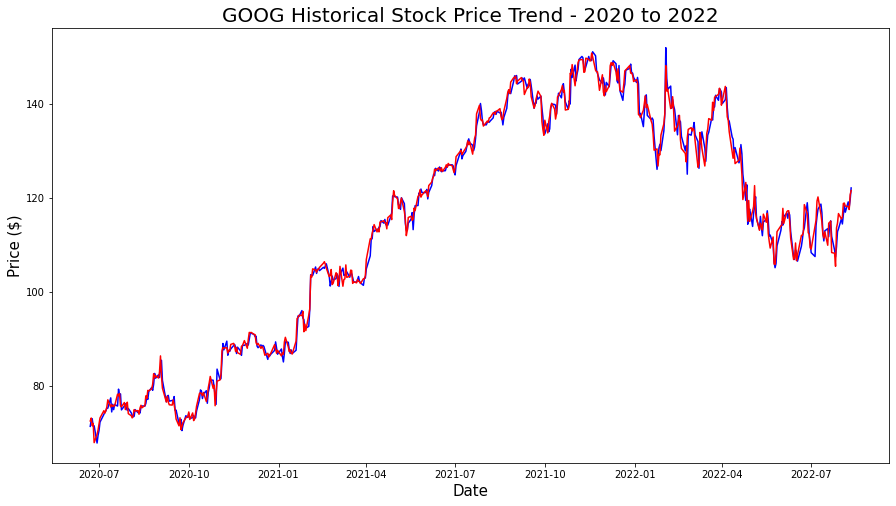

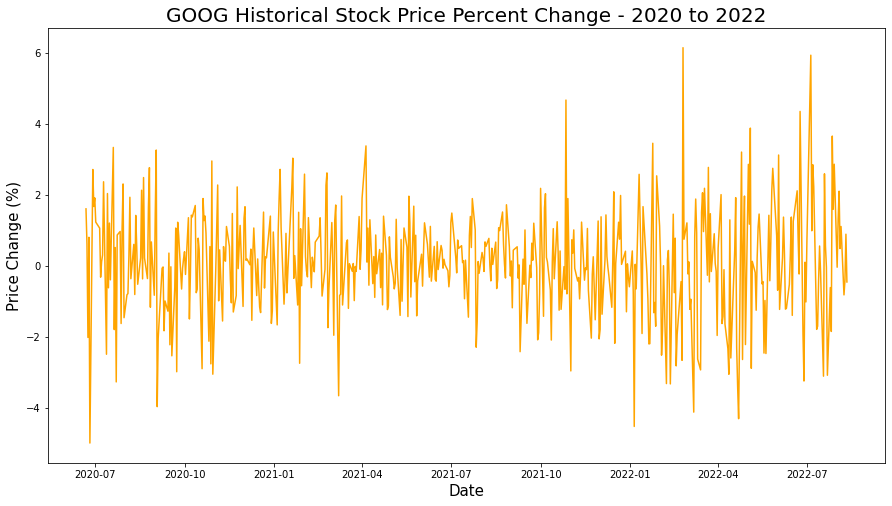

CPU times: user 477 ms, sys: 18.2 ms, total: 495 ms
Wall time: 535 ms


In [3]:
%%time

#Creating a dataframe to store historical stock price information from the API call
df_stocks = pd.DataFrame()
price_close = []
price_open = []
price_date = []

for result in data['results']: 
  price_close.append(result['close'])
  price_open.append(result['open'])
  price_date.append(result['date'])

df_stocks['date'] = price_date
df_stocks['date'] = list(map(pd.to_datetime,df_stocks['date']))
df_stocks['open_price'] = price_open
df_stocks['close_price'] = price_close
df_stocks['percent_change'] = ((df_stocks['close_price'] - df_stocks['open_price'])/df_stocks['open_price'])*100
df_stocks.index = df_stocks['date']
df_stocks = df_stocks.drop('date',axis=1)

print (df_stocks.head())
print ()

#Plotting the historical stock price trend
plt.figure(figsize=(15,8))
plt.plot(df_stocks['open_price'],color='blue')
plt.plot(df_stocks['close_price'],color='red')
plt.xlabel('Date',size=15)
plt.ylabel('Price ($)',size=15)
plt.title('GOOG Historical Stock Price Trend - 2020 to 2022',size=20)

#Plotting the historical stock price percent change
plt.figure(figsize=(15,8))
plt.plot(df_stocks['percent_change'],color='orange')
plt.xlabel('Date',size=15)
plt.ylabel('Price Change (%)',size=15)
plt.title('GOOG Historical Stock Price Percent Change - 2020 to 2022',size=20)
plt.show()

### 1.2 Price today - using the 'stock-price' API call

In [4]:
%%time

#Extracting current stock price
date_today = date.today()

url = "https://yahoofinance-stocks1.p.rapidapi.com/stock-prices"

querystring = {"EndDateInclusive":date_today,"StartDateInclusive":date_today,"Symbol":"GOOG","OrderBy":"Ascending"}

headers = {
	"X-RapidAPI-Key": "8df34c6c9fmshfbc86def7a396a8p11651djsna938a4c6a21a",
	"X-RapidAPI-Host": "yahoofinance-stocks1.p.rapidapi.com"
}

response = requests.request("GET", url, headers=headers, params=querystring)
data = json.loads(response.text)

#Printing API text response by first converting it to JSON format
print ("Full API response")
print ()
pprint.pprint(data)

Full API response

{'offset': 0,
 'responseStatus': None,
 'results': [{'adjClose': 121.419998,
              'close': 121.419998,
              'date': '2022-08-11',
              'high': 122.339996,
              'low': 121.417503,
              'open': 122.080002,
              'volume': 4672105}],
 'total': 1}
CPU times: user 35.7 ms, sys: 7.11 ms, total: 42.8 ms
Wall time: 3.03 s


In [5]:
#Current price is extracted by selecting the price for the given day
print ("Current Price:",data['results'][0]['close'])
print ("Day High Price:",data['results'][0]['high'])
print ("Day Low Price:",data['results'][0]['low'])
print ("Volume:",data['results'][0]['volume'])

Current Price: 121.419998
Day High Price: 122.339996
Day Low Price: 121.417503
Volume: 4672105


# 2. Live Stock Metadata

### 2.1 Extracting basic stock information using the 'stock-metadata' API call

In [6]:
%%time

#Extracting current stock price from stock metadata

url = "https://yahoofinance-stocks1.p.rapidapi.com/stock-metadata"

querystring = {"Symbol":"GOOG"}

headers = {
	"X-RapidAPI-Key": "8df34c6c9fmshfbc86def7a396a8p11651djsna938a4c6a21a",
	"X-RapidAPI-Host": "yahoofinance-stocks1.p.rapidapi.com"
}

response = requests.request("GET", url, headers=headers, params=querystring)
data = json.loads(response.text)

#Printing API text response by first converting it to JSON format
print ("Full API response")
print ()
pprint.pprint(data)

Full API response

{'responseStatus': None,
 'result': {'ask': 122.18,
            'askSize': 9,
            'averageDailyVolume10Day': 20503570,
            'averageDailyVolume3Month': 30136650,
            'bid': 122.22,
            'bidSize': 22,
            'currency': 'USD',
            'esgPopulated': False,
            'exchange': 'NMS',
            'exchangeDataDelayedBy': 0,
            'exchangeTimezoneName': 'America/New_York',
            'exchangeTimezoneShortName': 'EDT',
            'fiftyDayAverage': 113.86877,
            'fiftyDayAverageChange': 7.5312347,
            'fiftyDayAverageChangePercent': 0.0661396,
            'fiftyTwoWeekHigh': 152.1,
            'fiftyTwoWeekHighChange': -30.700005,
            'fiftyTwoWeekHighChangePercent': -0.20184092,
            'fiftyTwoWeekLow': 102.208,
            'fiftyTwoWeekLowChange': 19.192001,
            'fiftyTwoWeekLowChangePercent': 0.18777396,
            'fiftyTwoWeekRange': '102.208 - 152.1',
            'fullExch

### 2.2 Extracting some key metrics from the API metadata

In [8]:
#Current price is extracted by selecting the closing price for the given day
print ("Stock Ticker:",data['result']['symbol'])
print ("Company:",data['result']['shortName'])
print ("Current price:",data['result']['regularMarketPrice'])
print ("50-day Average:",data['result']['fiftyDayAverage'])
print ("52-week Range:",data['result']['fiftyTwoWeekRange'])
print ()
print ("Exchange:",data['result']['fullExchangeName'])
print ("Timezone:",data['result']['exchangeTimezoneName'])
print ("Market:",data['result']['market'])
print ("Quote Type:",data['result']['quoteType'])

Stock Ticker: GOOG
Company: Alphabet Inc.
Current price: 121.4
50-day Average: 113.86877
52-week Range: 102.208 - 152.1

Exchange: NasdaqGS
Timezone: America/New_York
Market: us_market
Quote Type: EQUITY


# 3. Live Stock Statistics

### 3.1 Extracting stock statistics and fundamentals using the 'stock-statistics' API call

In [9]:
%%time

import requests

url = "https://yahoofinance-stocks1.p.rapidapi.com/stock-statistics"

querystring = {"Symbol":"GOOG"}

headers = {
	"X-RapidAPI-Key": "8df34c6c9fmshfbc86def7a396a8p11651djsna938a4c6a21a",
	"X-RapidAPI-Host": "yahoofinance-stocks1.p.rapidapi.com"
}

response = requests.request("GET", url, headers=headers, params=querystring)
data = json.loads(response.text)

#Printing API text response by first converting it to JSON format
print ("Full API response")
print ()
pprint.pprint(data)

Full API response

{'responseStatus': None,
 'result': {'currency': 'USD',
            'quarterlyValuationMeasures': [{'label': 'Market Cap (intraday)',
                                            'period': 'Current',
                                            'value': '1570000000000.00'},
                                           {'label': 'Enterprise Value',
                                            'period': 'Current',
                                            'value': '1470000000000.00'},
                                           {'label': 'Trailing P/E',
                                            'period': 'Current',
                                            'value': '22.47'},
                                           {'label': 'Forward P/E',
                                            'period': 'Current',
                                            'value': '23.09'},
                                           {'label': 'PEG Ratio (5 yr '
                               

### 3.2 Displaying some key stock fundamentals from the API data

### 3.2.1 Trailing P/E Ratio

In [10]:
trailing_pe = data['result']['quarterlyValuationMeasures'][2]
print (trailing_pe['label'])
print (trailing_pe['value'])

Trailing P/E
22.47


 ### 3.2.2 Forward P/E

In [11]:
forward_pe = data['result']['quarterlyValuationMeasures'][3]
print (forward_pe['label'])
print (forward_pe['value'])

Forward P/E
23.09


### 3.2.3 Price/Sales Ratio

In [12]:
ps_ratio = data['result']['quarterlyValuationMeasures'][5]
print (ps_ratio['label'])
print (ps_ratio['value'])

Price/Sales
5.81
